## visualize Input Data
this is expected to be run with the csv-file generated in importTestData.ipynb

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

In [17]:
path = "beam1/beam1-0.csv"
dtype = {
       'time': 'int64', 
       'type': 'category', 
       'vehicle': 'string', 
       'parkingTaz': 'category', #
       'chargingPointType': 'category', 
       'primaryFuelLevel': 'float64', #
       'mode': 'category', 
       'currentTourMode': 'category', 
       'vehicleType': 'category', 
       'arrivalTime': 'float64', #
       'departureTime': 'float64', # 
       'linkTravelTime': 'string', 
       'primaryFuelType': 'category', 
       'parkingZoneId': 'category',
       'duration': 'float64' #
}
df_sim_new = pd.read_csv(path, dtype=dtype, index_col="time")
df_sim_new.head(3)

,type,vehicle,parkingTaz,chargingPointType,primaryFuelLevel,mode,currentTourMode,vehicleType,arrivalTime,departureTime,linkTravelTime,primaryFuelType,parkingZoneId,fuel,duration
time,,,,,,,,,,,,,,,
18163,ChargingPlugInEvent,5270466,530,publicfc(150.0|DC),2.535813e+08,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN
18163,RefuelSessionEvent,5270466,530,publicfc(150.0|DC),NaN,NaN,NaN,ev-L1-0-to-50000-LowTech-2035-SUV-BEV_300_XFC,NaN,NaN,<NA>,NaN,X-PEV-530-1,0.0,0.0
18163,ChargingPlugOutEvent,5270466,530,publicfc(150.0|DC),2.535813e+08,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN


In [15]:
df = df_sim_new.sort_index()
df.head(3)

,type,vehicle,parkingTaz,chargingPointType,primaryFuelLevel,mode,currentTourMode,vehicleType,arrivalTime,departureTime,linkTravelTime,primaryFuelType,parkingZoneId,fuel,duration
time,,,,,,,,,,,,,,,
18163,ChargingPlugInEvent,5270466,530,publicfc(150.0|DC),2.535813e+08,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN
18163,RefuelSessionEvent,5270466,530,publicfc(150.0|DC),NaN,NaN,NaN,ev-L1-0-to-50000-LowTech-2035-SUV-BEV_300_XFC,NaN,NaN,<NA>,NaN,X-PEV-530-1,0.0,0.0
18163,ChargingPlugOutEvent,5270466,530,publicfc(150.0|DC),2.535813e+08,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN


In [18]:
df.iloc[0:0,:]

,type,vehicle,parkingTaz,chargingPointType,primaryFuelLevel,mode,currentTourMode,vehicleType,arrivalTime,departureTime,linkTravelTime,primaryFuelType,parkingZoneId,fuel,duration
time,,,,,,,,,,,,,,,


In [61]:
# print taz
a = df.parkingTaz.cat.categories.to_numpy().astype("int64")
a = np.sort(a)
print(a)

[   9   11   12   21   39   69   75   88   98  103  104  110  114  132
  142  187  188  192  199  203  212  225  234  235  241  248  257  278
  295  309  315  325  330  331  355  356  371  387  389  401  402  412
  415  416  421  430  439  449  460  462  465  471  475  478  485  486
  497  504  518  520  530  539  540  554  564  565  579  583  607  612
  660  661  677  682  687  698  706  728  730  733  736  742  750  751
  754  765  766  767  770  777  795  810  824  862  863  873  891  900
  902  911  912  927  928  929  930  931  932  933  934  935  940  941
  942  943  944  945  946  947  948  949  950  951  954  955  956  957
  958  959  960  961  962  963  964  966  967  968  969  970  971  972
  973  978  979  980  981  982  983  984  985  986  987  988  989  990
  998 1003 1014 1018 1050 1054 1058 1069 1083 1096 1121 1122 1140 1145
 1146 1150 1161 1168 1178 1186 1241 1246 1269 1273 1280 1289 1291 1302
 1306 1314 1329 1331 1332 1340 1346 1348 1361 1374 1384 1395 1412 1421
 1427 

In [ ]:
# perform data cleaning. make sure that every Charging Event consits of
# ChargingPlugInEvent, RefuelSessionEvent, ChargingPlugOutEvent.

# did not finished coding, did not test.

PlugIn = np.array([], dtype=int)
RefuelSession = np.array([], dtype=int)
PlugOut = np.array([],dtype = int)
VehicleId = np.array([], dtype = int)
completeSequence = np.array([], dtype=bool)
for i in range(0, len(df)):
    row = df.iloc[i,:]
    if np.isin( row["vehicle"], VehicleId):
        if row["type"] == "ChargingPlugInEvent":
            PlugIn.append(i)
        if row["type"] == "RefuelSessionEvent":
            RefuelSession.append(i)
        if row["type"] == "ChargingPlugOutEvent":
            PlugOut.append(i)
    else:
        if row["type"] == "ChargingPlugInEvent" or row["type"] == "RefuelSessionEvent":
            VehicleId.append(row["vehicle"])
            if row["type"] == "ChargingPlugInEvent":
                PlugIn.append(i)
            else:
                PlugIn.append(0)
            if row["type"] == "RefuelSessionEvent":
                RefuelSession.append(i)
            else:
                RefuelSession.append(0)
            PlugOut.append(0)
    

    

C:\Users\akaju\anaconda3\envs\py_btms_controller\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


Text(0.5, 0, 'time in sec.')

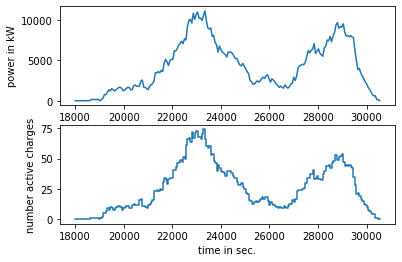

In [62]:
# read out charging demand
#set this, if you want to do this for a special TAZ

setTAZ = False
taz = 103

time = []
startTime = []
demand = []
duration = []
power = []
for i in range(0, len(df)):
    if df["type"].iloc[i] == "RefuelSessionEvent":
        if not setTAZ or df["parkingTaz"].iloc[i] == str(taz):
            time.append(df.index[i])
            startTime.append(df.index[i] - df["duration"].iloc[i])
            demand.append(df["fuel"].iloc[i])
            duration.append(df["duration"].iloc[i])
            #calculate power
            x = df["fuel"].iloc[i] / df["duration"].iloc[i]
            if math.isnan(x):
                x = 0
            power.append(x)

#discretize / resample
t_start = 18000
t_end   = max(time)
step    = 60

power_new  = []
time_new = []
no_active =[]
t_act = t_start
time = np.array(time)
startTime = np.array(startTime)
power = np.array(power)
while t_act < t_end + step:
    idx1 = (time >= t_act)
    idx2 = (startTime < t_act)
    idx = idx1 & idx2
    power_new.append( power[idx].sum())
    no_active.append(idx.sum())
    time_new.append( t_act )
    t_act += step    

#print power demand
fig, ax = plt.subplots(2,1)
ax[0].plot(time_new, np.array(power_new)/1e3)
ax[0].set_ylabel("power in kW")
ax[1].step(time_new, no_active)
ax[1].set_ylabel("number active charges")
ax[1].set_xlabel("time in sec.")